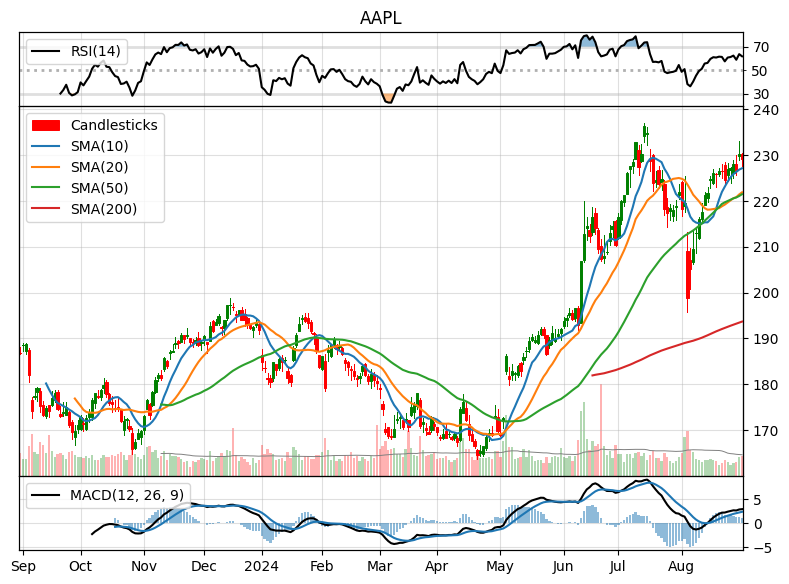

In [39]:
import yfinance as yf
import matplotlib.pyplot as plt
import streamlit as st
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume
from mplchart.indicators import ROC, SMA, EMA, RSI, MACD

ticker = 'AAPL'
prices = yf.Ticker(ticker).history(period="1y", interval="1d")

indicators = [
    Candlesticks(colordn='red',colorup='green'),SMA(10),SMA(20), SMA(50), SMA(200), Volume(),
    RSI(),
    MACD(),
]

chart = Chart(title=ticker,figsize=(8, 6))
chart.plot(prices, indicators)
chart.show()


In [33]:
x = chart.render(format='png')

In [20]:
x

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xb0\x00\x00\x03\x84\x08\x06\x00\x00\x00\xb1m\xc8\xfa\x00\x00\x009tEXtSoftware\x00Matplotlib version3.9.2, https://matplotlib.org/!N\x03\xd9\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x01\x00\x00IDATx\x9c\xec\xdduX\x14\xeb\xdb\x07\xf0\xef.\x9d\x02\x8a\x80\x086\x8a\xdd\x80\xadGQ\x8ccw`\'v{\x8e\xdd]G\xd0\xe3\xc1F\xb1\xbb\x0b0QQ\x14\x83\x12\x14\x15\x10\x8b\xee\x9d\xe7\xfd\x83w\xe7\xc7J\xc3\x16p\x7f\xaek\xafKwf\x9e\xb9\xf7\x99\xd9a\xf6\x9e\'\x04\x8c1\x06B\x08!\x84\x10B\x08!\x84\x10B\x94\x94P\xd1\x01\x10B\x08!\x84\x10B\x08!\x84\x10\x92\x1bJ`\x11B\x08!\x84\x10B\x08!\x84\x10\xa5F\t,B\x08!\x84\x10B\x08!\x84\x10\xa2\xd4(\x81E\x08!\x84\x10B\x08!\x84\x10B\x94\x1a%\xb0\x08!\x84\x10B\x08!\x84\x10B\x88R\xa3\x04\x16!\x84\x10B\x08!\x84\x10B\x08Qj\x94\xc0"\x84\x10B\x08!\x84\x10B\x08!J\x8d\x12X\x84\x10B\x08!\x84\x10B\x08!D\xa9Q\x02\x8b\x10B\x08!\x84\x10B\x08!\x84(5J`\x11B\x08!\x84\x10B\x08!\x84\x10\xa5F\t,B\x08!\x84\x10B\x08!\x84\x10\xa

In [21]:
from PIL import Image  # Import the Python Imaging Library (PIL)


In [34]:
import numpy as np
from PIL import Image
import io

In [35]:
image = Image.open(io.BytesIO(x))


In [36]:
type(image)

PIL.PngImagePlugin.PngImageFile

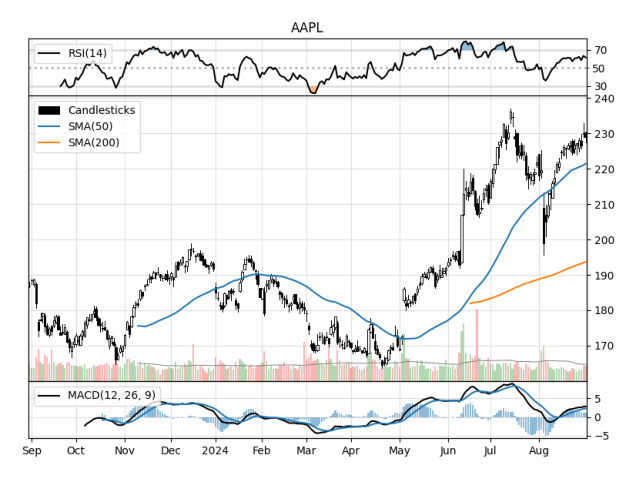

In [37]:
image_array = np.array(image)


# Display the image using matplotlib with a 12:9 aspect ratio
fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size to 12:9
ax.imshow(image_array)
ax.axis('off')  # Hide the axes

# Show the plot
plt.show()

In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://groww.in/mutual-funds/sbi-nifty-500-index-fund-direct-growth"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract symbols (adjust selectors based on webpage structure)
symbols = [row.text for row in soup.select(".holdings-table .symbol")]
print("Top Holdings:", symbols[:10])  # Example: First 10 symbols

Top Holdings: []


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.5paisa.com/nifty-500-stock-list"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

try:
    # Fetch the webpage
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise error if bad status
    
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table containing the Nifty 500 list
    table = soup.find('table', {'class': 'table'})  # Adjust class if needed
    
    if table:
        # Extract table rows
        rows = table.find_all('tr')
        
        # Extract headers
        headers = [th.text.strip() for th in rows[0].find_all('th')]
        
        # Extract data rows
        data = []
        for row in rows[1:]:
            cols = row.find_all('td')
            data.append([col.text.strip() for col in cols])
        
        # Create DataFrame
        df = pd.DataFrame(data, columns=headers)
        
        # Display first few rows
        print("Nifty 500 Stocks List:")
        print(df.head())
        
    else:
        print("Table not found on the webpage")

except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Nifty 500 Stocks List:
               Company     LTP Market Cap (Cr.) PE Ratio     EPS
0              ACC Ltd  2001.5         37552.76    16.32  122.57
1  Aegis Logistics Ltd  747.75         26256.56    49.64   15.07
2     Apollo Tyres Ltd  472.25         29989.47    45.23   10.44
3    Ashok Leyland Ltd   249.8         73354.45    22.67   11.02
4     Asian Paints Ltd  2451.2        235080.19     60.9   40.24


In [2]:
df.shape

(500, 5)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("StockScreener/ind_nifty500list.csv")
df.head()

Company Name                Industry     Symbol Series  \
0          360 ONE WAM Ltd.      Financial Services     360ONE     EQ   
1             3M India Ltd.             Diversified    3MINDIA     EQ   
2            ABB India Ltd.           Capital Goods        ABB     EQ   
3                  ACC Ltd.  Construction Materials        ACC     EQ   
4  ACME Solar Holdings Ltd.                   Power  ACMESOLAR     EQ   

      ISIN Code  
0  INE466L01038  
1  INE470A01017  
2  INE117A01022  
3  INE012A01025  
4  INE622W01025

In [4]:
df.columns

Index(['Company Name', 'Industry', 'Symbol', 'Series', 'ISIN Code'], dtype='object')

In [5]:
df.shape

(501, 5)

In [6]:
df['YFSYMBOL'] = df['Symbol'] + '.NS'

In [7]:
df500 = list(df['YFSYMBOL'])

In [8]:
df500

['360ONE.NS',
 '3MINDIA.NS',
 'ABB.NS',
 'ACC.NS',
 'ACMESOLAR.NS',
 'AIAENG.NS',
 'APLAPOLLO.NS',
 'AUBANK.NS',
 'AWL.NS',
 'AADHARHFC.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABBOTINDIA.NS',
 'ACE.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'ATGL.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'ABREL.NS',
 'ABSLAMC.NS',
 'AEGISLOG.NS',
 'AFCONS.NS',
 'AFFLE.NS',
 'AJANTPHARM.NS',
 'AKUMS.NS',
 'APLLTD.NS',
 'ALIVUS.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'ALOKINDS.NS',
 'ARE&M.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANANDRATHI.NS',
 'ANANTRAJ.NS',
 'ANGELONE.NS',
 'APARINDS.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTUS.NS',
 'ASAHIINDIA.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTERDM.NS',
 'ASTRAZEN.NS',
 'ASTRAL.NS',
 'ATUL.NS',
 'AUROPHARMA.NS',
 'AIIL.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BASF.NS',
 'BEML.NS',
 'BLS.NS',
 'BSE.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BAJAJHFL.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS'

In [ ]:
def get_yf_symbol(company_name: str):
    match = df.loc[df['Company Name'] == company_name, 'YFSYMBOL']
    return match.iloc[0] if not match.empty else None


In [12]:
print(get_yf_symbol("ABBs India Ltd."))  # Output: ABB.NS

None


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("StockScreener/ind_niftymicrocap250_list.csv")

In [3]:
df.head()

Company Name                        Industry      Symbol Series  \
0       AGI Greenpac Ltd.                   Capital Goods         AGI     EQ   
1     ASK Automotive Ltd.  Automobile and Auto Components  ASKAUTOLTD     EQ   
2        Aarti Drugs Ltd.                      Healthcare  AARTIDRUGS     EQ   
3   Aarti Pharmalabs Ltd.                      Healthcare  AARTIPHARM     EQ   
4  Acutaas Chemicals Ltd.                      Healthcare     ACUTAAS     EQ   

      ISIN Code  
0  INE415A01038  
1  INE491J01022  
2  INE767A01016  
3  INE0LRU01027  
4  INE00FF01025

In [4]:
df['MCYFSYMBOL'] = df['Symbol'] + '.NS'

In [5]:
df

Company Name  \
0                                AGI Greenpac Ltd.   
1                              ASK Automotive Ltd.   
2                                 Aarti Drugs Ltd.   
3                            Aarti Pharmalabs Ltd.   
4                           Acutaas Chemicals Ltd.   
..                                             ...   
246  Yatharth Hospital & Trauma Care Services Ltd.   
247             Zaggle Prepaid Ocean Services Ltd.   
248                 Zinka Logistics Solutions Ltd.   
249                            Zydus Wellness Ltd.   
250                                   eMudhra Ltd.   

                           Industry      Symbol Series     ISIN Code  \
0                     Capital Goods         AGI     EQ  INE415A01038   
1    Automobile and Auto Components  ASKAUTOLTD     EQ  INE491J01022   
2                        Healthcare  AARTIDRUGS     EQ  INE767A01016   
3                        Healthcare  AARTIPHARM     EQ  INE0LRU01027   
4                        Healthcare     ACUTAAS     EQ  INE00FF01025   
..                              ...         ...    ...           ...   
246                      Healthcare    YATHARTH     EQ  INE0JO301016   
247          Information Technology      ZAGGLE     EQ  INE07K301024   
248                        Services   BLACKBUCK     EQ  INE0UIZ01018   
249      Fast Moving Consumer Goods   ZYDUSWELL     EQ  INE768C01010   
250          Information Technology     EMUDHRA     EQ  INE01QM01018   

        MCYFSYMBOL  
0           AGI.NS  
1    ASKAUTOLTD.NS  
2    AARTIDRUGS.NS  
3    AARTIPHARM.NS  
4       ACUTAAS.NS  
..             ...  
246    YATHARTH.NS  
247      ZAGGLE.NS  
248   BLACKBUCK.NS  
249   ZYDUSWELL.NS  
250     EMUDHRA.NS  

[251 rows x 6 columns]

In [1]:
import yfinance as yf
import pandas as pd
import ta  # from 'technical-analysis' library

In [22]:
import yfinance as yf
import pandas as pd
import ta

def compute_latest_technical_indicators(ticker: str):
    # Fetch historical price data
    data = yf.Ticker(ticker).history(period="1y", interval="1d")
    data.dropna(inplace=True)

    # Compute Moving Averages
    data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
    data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_100'] = data['Close'].rolling(window=100).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()

    # Compute RSI
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()

    # Compute MACD
    macd = ta.trend.MACD(close=data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()

    # Select only the latest row
    latest = data.iloc[-1]

    # Return as dictionary
    result = {
        'Close': round(latest['Close'], 2),
        'Volume': int(latest['Volume']),
        'EMA_10': round(latest['EMA_10'], 2),
        'EMA_20': round(latest['EMA_20'], 2),
        'SMA_50': round(latest['SMA_50'], 2),
        'SMA_100': round(latest['SMA_100'], 2),
        'SMA_200': round(latest['SMA_200'], 2),
        'RSI': round(latest['RSI'], 2),
        'MACD': round(latest['MACD'], 2),
        'MACD_Signal': round(latest['MACD_Signal'], 2),
        'MACD_Diff': round(latest['MACD_Diff'], 2)
    }

    return result



In [23]:
# Example usage:
ticker = "TCS.NS"
latest_indicators = compute_latest_technical_indicators(ticker)


In [26]:
latest_indicators

{'Close': np.float64(3189.9),
 'Volume': 3431674,
 'EMA_10': np.float64(3271.42),
 'EMA_20': np.float64(3323.79),
 'SMA_50': np.float64(3410.75),
 'SMA_100': np.float64(3427.75),
 'SMA_200': np.float64(3765.81),
 'RSI': np.float64(27.27),
 'MACD': np.float64(-56.76),
 'MACD_Signal': np.float64(-36.09),
 'MACD_Diff': np.float64(-20.67)}

In [25]:
print(latest_indicators)

{'Close': np.float64(3189.9), 'Volume': 3431674, 'EMA_10': np.float64(3271.42), 'EMA_20': np.float64(3323.79), 'SMA_50': np.float64(3410.75), 'SMA_100': np.float64(3427.75), 'SMA_200': np.float64(3765.81), 'RSI': np.float64(27.27), 'MACD': np.float64(-56.76), 'MACD_Signal': np.float64(-36.09), 'MACD_Diff': np.float64(-20.67)}
